In [10]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow.compat.v1 as tf
import tensorflow.compat.v1.keras as keras
from keras.datasets import mnist

In [ ]:
def autoencoder(input_dims, hidden_layers, latent_dims):
    # Encoder
    encoder_inputs = keras.Input(shape=(input_dims,))
    x = encoder_inputs
    for units in hidden_layers:
        x = keras.layers.Dense(units, activation='relu')(x)
    latent_layer = keras.layers.Dense(latent_dims, activation='relu')(x)

    encoder = keras.Model(encoder_inputs, latent_layer, name="encoder")

    # Decoder
    decoder_inputs = keras.Input(shape=(latent_dims,))
    x = decoder_inputs
    for units in reversed(hidden_layers):
        x = keras.layers.Dense(units, activation='relu')(x)
    decoder_outputs = keras.layers.Dense(input_dims, activation='sigmoid')(x)

    decoder = keras.Model(decoder_inputs, decoder_outputs, name="decoder")

    # Autoencoder
    autoencoder_inputs = keras.Input(shape=(input_dims,))
    encoder_output = encoder(autoencoder_inputs)
    decoder_output = decoder(encoder_output)
    auto = keras.Model(autoencoder_inputs, decoder_output, name="autoencoder")

    # Compile the autoencoder
    auto.compile(optimizer='adam', loss='binary_crossentropy')

    return encoder, decoder, auto


In [ ]:
# autoencoder = __import__.autoencoder

(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((-1, 784))
x_test = x_test.reshape((-1, 784))
np.random.seed(0)
tf.set_random_seed(0)
encoder, decoder, auto = autoencoder(784, [128, 64], 32)
auto.fit(x_train, x_train, epochs=50,batch_size=256, shuffle=True,
                validation_data=(x_test, x_test))
encoded = encoder.predict(x_test[:10])
print(np.mean(encoded))
reconstructed = decoder.predict(encoded)

for i in range(10):
    ax = plt.subplot(2, 10, i + 1)
    ax.axis('off')
    plt.imshow(x_test[i].reshape((28, 28)))
    ax = plt.subplot(2, 10, i + 11)
    ax.axis('off')
    plt.imshow(reconstructed[i].reshape((28, 28)))
plt.show()

In [68]:
"""Convolutional Autoencoder"""

def autoencoder(input_dims, filters, latent_dims):
    """Creates a convolutional autoencoder:
    input_dims is an integer containing the dimensions of the model input.
    filters is a list containing the number of filters for each convolutional
        layer in the encoder, respectively.
            The filters should be reversed for the decoder.
    latent_dims is a tuple of integers containing the dimensions of the
        latent space representation.
    Each convolution in the encoder should use a kernel size of (3, 3) with
        same padding and relu activation, followed by max pooling size (2, 2).
    Each convolution in the decoder, except for the last two, should use a
        filter size of (3, 3) with same padding and relu activation,
        followed by upsampling of size (2, 2).
    The second to last convolution should instead use valid padding.
    The last convolution should have the same number of filters as the number
        of channels in input_dims with sigmoid activation and no upsampling.
    Returns: encoder, decoder, auto
    encoder is the encoder model.
    decoder is the decoder model.
    auto is the full autoencoder model.
    The autoencoder model should be compiled using adam optimization and
        binary cross-entropy loss."""
    # Encoder model
    encoder_inputs = keras.layers.Input(shape=input_dims)
    x = encoder_inputs
    for num_filters in range(len(filters)):
        x = keras.layers.Conv2D(filters[num_filters], (3, 3),
                                activation='relu', padding='same')(x)
        x = keras.layers.MaxPooling2D((2, 2), padding='same')(x)

    encoder = keras.Model(encoder_inputs, x)

    # Decoder model
    decoder_inputs = keras.layers.Input(shape=latent_dims)
    y = decoder_inputs
    padding = 'same'
    for num_filters in range(len(filters) - 1, -1, -1):
      if num_filters == 0:
        padding = 'valid'

      y = keras.layers.Conv2D(filters[num_filters], (3, 3),
                                activation='relu', padding=padding)(y)
      y = keras.layers.UpSampling2D((2, 2))(y)

    decoder_outputs = keras.layers.Conv2D(
        input_dims[-1], (3, 3), activation='sigmoid', padding='same')(y)

    decoder = keras.Model(decoder_inputs, decoder_outputs)

    # Autoencoder model
    auto = keras.Model(
        encoder_inputs, decoder(encoder(encoder_inputs)))

    auto.compile(optimizer='adam', loss='binary_crossentropy')

    return encoder, decoder, auto

(60000, 28, 28, 1)
(10000, 28, 28, 1)
Epoch 1/50
235/235 [==============================] - 4s 9ms/step - loss: 0.2497 - val_loss: 0.1628
Epoch 2/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1515 - val_loss: 0.1407
Epoch 3/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1363 - val_loss: 0.1306
Epoch 4/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1289 - val_loss: 0.1257
Epoch 5/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1241 - val_loss: 0.1214
Epoch 6/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1205 - val_loss: 0.1178
Epoch 7/50
235/235 [==============================] - 2s 7ms/step - loss: 0.1175 - val_loss: 0.1153
Epoch 8/50
235/235 [==============================] - 2s 7ms/step - loss: 0.1152 - val_loss: 0.1134
Epoch 9/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1133 - val_loss: 0.1115
Epoch 10/50
235/235 [==============================] - 2s 8ms

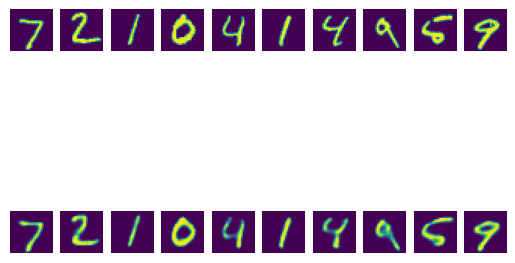

In [69]:
# autoencoder = __import__('2-convolutional').autoencoder

(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.expand_dims(x_train, axis=3)
x_test = np.expand_dims(x_test, axis=3)
print(x_train.shape)
print(x_test.shape)
np.random.seed(0)
tf.set_random_seed(0)
encoder, decoder, auto = autoencoder((28, 28, 1), [16, 8, 8], (4, 4, 8))
auto.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True,
                validation_data=(x_test, x_test))
encoded = encoder.predict(x_test[:10])
print(np.mean(encoded))
reconstructed = decoder.predict(encoded)[:,:,:,0]

for i in range(10):
    ax = plt.subplot(2, 10, i + 1)
    ax.axis('off')
    plt.imshow(x_test[i,:,:,0])
    ax = plt.subplot(2, 10, i + 11)
    ax.axis('off')
    plt.imshow(reconstructed[i])
plt.show()


In [71]:
def autoencoder(input_dims, hidden_layers, latent_dims):
    # Encoder
    encoder_inputs = tf.keras.layers.Input(shape=(input_dims,))
    x = encoder_inputs
    for units in hidden_layers:
        x = tf.keras.layers.Dense(units, activation='relu')(x)
    z_mean = tf.keras.layers.Dense(latent_dims, activation=None)(x)
    z_log_var = tf.keras.layers.Dense(latent_dims, activation=None)(x)

    # Reparameterization Trick
    def sampling(args):
        z_mean, z_log_var = args
        epsilon = tf.keras.backend.random_normal(shape=(tf.shape(z_mean)[0], latent_dims), mean=0.0, stddev=1.0)
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

    z = tf.keras.layers.Lambda(sampling)([z_mean, z_log_var])

    encoder = tf.keras.models.Model(encoder_inputs, [z, z_mean, z_log_var], name="encoder")

    # Decoder
    decoder_inputs = tf.keras.layers.Input(shape=(latent_dims,))
    x = decoder_inputs
    for units in reversed(hidden_layers):
        x = tf.keras.layers.Dense(units, activation='relu')(x)
    decoded = tf.keras.layers.Dense(input_dims, activation='sigmoid')(x)

    decoder = tf.keras.models.Model(decoder_inputs, decoded, name="decoder")

    # Autoencoder
    autoencoder_inputs = tf.keras.layers.Input(shape=(input_dims,))
    z_encoded, z_mean, z_log_var = encoder(autoencoder_inputs)
    decoded_output = decoder(z_encoded)
    auto = tf.keras.models.Model(autoencoder_inputs, decoded_output, name="vae")

    # Compile the autoencoder
    reconstruction_loss = tf.keras.losses.binary_crossentropy(autoencoder_inputs, decoded_output)
    reconstruction_loss = tf.keras.backend.sum(reconstruction_loss, axis=-1)
    kl_loss = -0.5 * tf.keras.backend.sum(1 + z_log_var - tf.keras.backend.square(z_mean) - tf.keras.backend.exp(z_log_var), axis=-1)
    vae_loss = tf.keras.backend.mean(reconstruction_loss + kl_loss)

    auto.add_loss(vae_loss)
    auto.compile(optimizer='adam')

    return encoder, decoder, auto

Epoch 1/50
235/235 [==============================] - 5s 9ms/step - loss: 73.9226 - val_loss: 60.6826
Epoch 2/50
235/235 [==============================] - 1s 6ms/step - loss: 59.8297 - val_loss: 57.0509
Epoch 3/50
235/235 [==============================] - 1s 6ms/step - loss: 57.6972 - val_loss: 56.0723
Epoch 4/50
235/235 [==============================] - 1s 6ms/step - loss: 56.9308 - val_loss: 55.6458
Epoch 5/50
235/235 [==============================] - 1s 6ms/step - loss: 56.4748 - val_loss: 55.1669
Epoch 6/50
235/235 [==============================] - 1s 6ms/step - loss: 56.1014 - val_loss: 54.8997
Epoch 7/50
235/235 [==============================] - 1s 6ms/step - loss: 55.8199 - val_loss: 54.6585
Epoch 8/50
235/235 [==============================] - 2s 8ms/step - loss: 55.5590 - val_loss: 54.4081
Epoch 9/50
235/235 [==============================] - 2s 9ms/step - loss: 55.2985 - val_loss: 54.2112
Epoch 10/50
235/235 [==============================] - 1s 6ms/step - loss: 55.0749

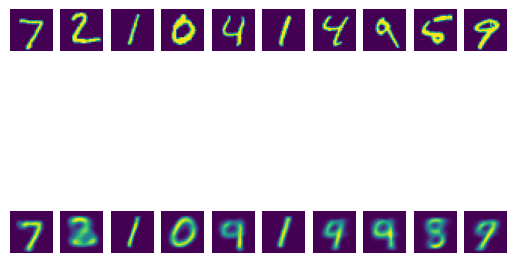

5/5 [==============================] - 0s 4ms/step


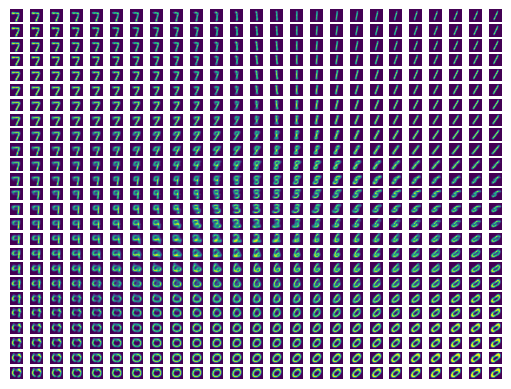

In [72]:
# autoencoder = __import__('3-variational').autoencoder

(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((-1, 784))
x_test = x_test.reshape((-1, 784))
np.random.seed(0)
tf.set_random_seed(0)
encoder, decoder, auto = autoencoder(784, [512], 2)
auto.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True,
                validation_data=(x_test, x_test))
encoded, mu, log_sig = encoder.predict(x_test[:10])
print(mu)
print(np.exp(log_sig / 2))
reconstructed = decoder.predict(encoded).reshape((-1, 28, 28))
x_test = x_test.reshape((-1, 28, 28))

for i in range(10):
    ax = plt.subplot(2, 10, i + 1)
    ax.axis('off')
    plt.imshow(x_test[i])
    ax = plt.subplot(2, 10, i + 11)
    ax.axis('off')
    plt.imshow(reconstructed[i])
plt.show()


l1 = np.linspace(-3, 3, 25)
l2 = np.linspace(-3, 3, 25)
L = np.stack(np.meshgrid(l1, l2, sparse=False, indexing='ij'), axis=2)
G = decoder.predict(L.reshape((-1, 2)), batch_size=125)

for i in range(25*25):
    ax = plt.subplot(25, 25, i + 1)
    ax.axis('off')
    plt.imshow(G[i].reshape((28, 28)))
plt.show()